# Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot

In [30]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Importing the work file

In [155]:
customers = pd.read_excel("C:/Users/Jarvis/Desktop/Berlin.xlsx")  # importing file

In [156]:
customers.head(5)   #exploring the variables

,Unnamed: 0,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,Vacancy Rate (%),1.70,1.6,1.30,1.20,1.00,0.80,0.70,0.60,0.50,0.50,0.60
1,NaN,Completed Apartments (per 1.000 Inhabitatns),2.65,2.4,3.15,2.48,3.13,3.41,3.38,3.36,2.91,2.34,2.45
2,NaN,Completed Apartments,1550.00,1417.0,1881.00,1500.00,1914.00,2129.00,2125.00,2129.00,1847.00,1486.00,1546.00
3,NaN,Building Permits New Apartments,1292.00,1515.0,1316.00,1409.00,1340.00,1677.00,2010.00,1198.00,1840.00,1637.00,1214.00
4,NaN,Social Housing Stock,16722.00,16558.0,16369.00,15625.00,15672.00,15356.00,14547.00,14241.00,14043.00,13987.00,14274.00


In [159]:
customers=customers.transpose()

In [162]:
customers.to_excel("C:/Users/Jarvis/Desktop/Berlinmodified.xlsx", index = False)

In [185]:
customers = pd.read_excel("C:/Users/Jarvis/Desktop/Berlinmodified.xlsx")

In [186]:
customers.head()

,Year,Vacancy Rate,Completed Apartments/1000,Completed Apartments,Building Permits New Apartments,Social Housing Stock,Interest Rate Housing Loans (%),Living Space per Capita (m²),Population,Migration Balance,Income per Capita,Rate of Unemployment,Average Asking Rent,Comp Rent,Purchase Price new Apartments
0,2010,1.7,2.65,1550,1292,16722,4.08,38.3,584000,4277,28552,5.8,8.76,7.22,3180
1,2011,1.6,2.40,1417,1515,16558,3.75,38.1,591000,6209,29853,5.2,9.00,7.22,3369
2,2012,1.3,3.15,1881,1316,16369,3.54,37.8,598000,6194,30780,5.9,9.35,7.84,3492
3,2013,1.2,2.48,1500,1409,15625,2.80,37.6,604000,5542,31258,5.5,9.97,7.84,3827
4,2014,1.0,3.13,1914,1340,15672,2.87,37.4,612000,6947,32359,5.4,10.26,8.44,4303


In [187]:
customers.dtypes

Year                                 int64
Vacancy Rate                       float64
Completed Apartments/1000          float64
Completed Apartments                 int64
Building Permits New Apartments      int64
Social Housing Stock                 int64
Interest Rate Housing Loans (%)    float64
Living Space per Capita (m²)       float64
Population                           int64
Migration Balance                    int64
Income per Capita                    int64
Rate of Unemployment               float64
Average Asking Rent                float64
Comp Rent                          float64
Purchase Price new Apartments        int64
dtype: object

In [188]:
customers.head(13)

,Year,Vacancy Rate,Completed Apartments/1000,Completed Apartments,Building Permits New Apartments,Social Housing Stock,Interest Rate Housing Loans (%),Living Space per Capita (m²),Population,Migration Balance,Income per Capita,Rate of Unemployment,Average Asking Rent,Comp Rent,Purchase Price new Apartments
0,2010,1.7,2.65,1550,1292,16722,4.08,38.3,584000,4277,28552,5.8,8.76,7.22,3180
1,2011,1.6,2.40,1417,1515,16558,3.75,38.1,591000,6209,29853,5.2,9.00,7.22,3369
2,2012,1.3,3.15,1881,1316,16369,3.54,37.8,598000,6194,30780,5.9,9.35,7.84,3492
3,2013,1.2,2.48,1500,1409,15625,2.80,37.6,604000,5542,31258,5.5,9.97,7.84,3827
4,2014,1.0,3.13,1914,1340,15672,2.87,37.4,612000,6947,32359,5.4,10.26,8.44,4303
5,2015,0.8,3.41,2129,1677,15356,2.15,37.0,624000,10319,32882,5.3,10.91,8.44,5049
6,2016,0.7,3.38,2125,2010,14547,2.00,36.9,628000,2937,33876,4.9,11.74,8.95,5449
7,2017,0.6,3.36,2129,1198,14241,1.82,36.9,633000,3459,35332,4.3,13.27,8.95,5843
8,2018,0.5,2.91,1847,1840,14043,1.88,37.0,635000,1134,36531,3.9,14.15,9.60,6341
9,2019,0.5,2.34,1486,1637,13987,1.92,37.1,636000,-113,37314,4.2,14.21,9.60,6615


In [189]:
customers.corr()   #correlation matrix

,Year,Vacancy Rate,Completed Apartments/1000,Completed Apartments,Building Permits New Apartments,Social Housing Stock,Interest Rate Housing Loans (%),Living Space per Capita (m²),Population,Migration Balance,Income per Capita,Rate of Unemployment,Average Asking Rent,Comp Rent,Purchase Price new Apartments
Year,1.000000,-0.980906,0.208310,0.368451,0.483413,-0.982679,-0.948490,-0.904409,0.981669,-0.564400,0.994981,-0.884192,0.975175,0.984174,0.988945
Vacancy Rate,-0.980906,1.000000,-0.376728,-0.525692,-0.489484,0.966089,0.977264,0.964470,-0.995547,0.439910,-0.964406,0.814980,-0.932170,-0.974948,-0.962826
Completed Apartments/1000,0.208310,-0.376728,1.000000,0.985149,0.117474,-0.216104,-0.383413,-0.542916,0.367140,0.346198,0.162729,0.007037,0.121317,0.258992,0.207918
Completed Apartments,0.368451,-0.525692,0.985149,1.000000,0.203819,-0.377417,-0.534331,-0.676096,0.519516,0.238137,0.322540,-0.151793,0.282256,0.409740,0.368304
Building Permits New Apartments,0.483413,-0.489484,0.117474,0.203819,1.000000,-0.492065,-0.509189,-0.508429,0.508241,-0.278918,0.451572,-0.437522,0.426090,0.514705,0.517132
Social Housing Stock,-0.982679,0.966089,-0.216104,-0.377417,-0.492065,1.000000,0.956492,0.903657,-0.971294,0.618691,-0.973804,0.901585,-0.974440,-0.964766,-0.978952
Interest Rate Housing Loans (%),-0.948490,0.977264,-0.383413,-0.534331,-0.509189,0.956492,1.000000,0.980145,-0.983775,0.370031,-0.919384,0.794448,-0.893130,-0.918535,-0.933284
Living Space per Capita (m²),-0.904409,0.964470,-0.542916,-0.676096,-0.508429,0.903657,0.980145,1.000000,-0.966345,0.252966,-0.868774,0.705198,-0.824115,-0.890653,-0.884395
Population,0.981669,-0.995547,0.367140,0.519516,0.508241,-0.971294,-0.983775,-0.966345,1.000000,-0.439263,0.963884,-0.840189,0.937605,0.965059,0.972771
Migration Balance,-0.564400,0.439910,0.346198,0.238137,-0.278918,0.618691,0.370031,0.252966,-0.439263,1.000000,-0.603632,0.695255,-0.675892,-0.585851,-0.590727


<AxesSubplot:>

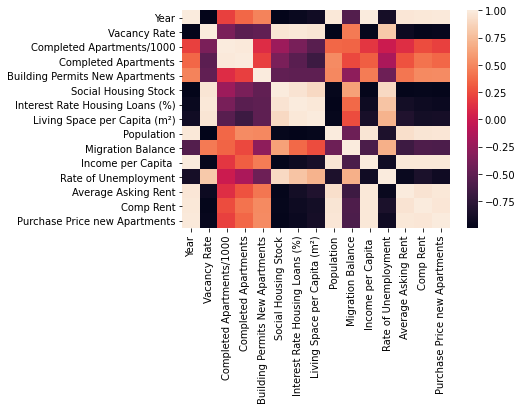

In [216]:
sns.heatmap(customers.corr())  #heatmap for correlation matrix

In [193]:
customers.describe() #descriptive statistics

,Year,Vacancy Rate,Completed Apartments/1000,Completed Apartments,Building Permits New Apartments,Social Housing Stock,Interest Rate Housing Loans (%),Living Space per Capita (m²),Population,Migration Balance,Income per Capita,Rate of Unemployment,Average Asking Rent,Comp Rent,Purchase Price new Apartments
count,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2014.50000,0.990000,2.921000,1797.80000,1523.400000,15312.000000,2.681000,37.410000,614500.000000,4690.500000,32873.700000,5.040000,11.162000,8.410000,4746.800000
std,3.02765,0.443346,0.423699,287.05586,263.048876,1053.334494,0.856056,0.517365,19346.260046,3028.528291,2890.611663,0.693141,2.082236,0.875544,1281.857056
min,2010.00000,0.500000,2.340000,1417.00000,1198.000000,13987.000000,1.820000,36.900000,584000.000000,-113.000000,28552.000000,3.900000,8.760000,7.220000,3180.000000
25%,2012.25000,0.625000,2.522500,1512.50000,1322.000000,14317.500000,1.940000,37.000000,599500.000000,3067.500000,30899.500000,4.450000,9.505000,7.840000,3575.750000
50%,2014.50000,0.900000,3.020000,1864.00000,1462.000000,15490.500000,2.475000,37.250000,618000.000000,4909.500000,32620.500000,5.250000,10.585000,8.440000,4676.000000
75%,2016.75000,1.275000,3.307500,2072.25000,1667.000000,16194.750000,3.372500,37.750000,631750.000000,6205.250000,34968.000000,5.475000,12.887500,8.950000,5744.500000
max,2019.00000,1.700000,3.410000,2129.00000,2010.000000,16722.000000,4.080000,38.300000,636000.000000,10319.000000,37314.000000,5.900000,14.210000,9.600000,6615.000000


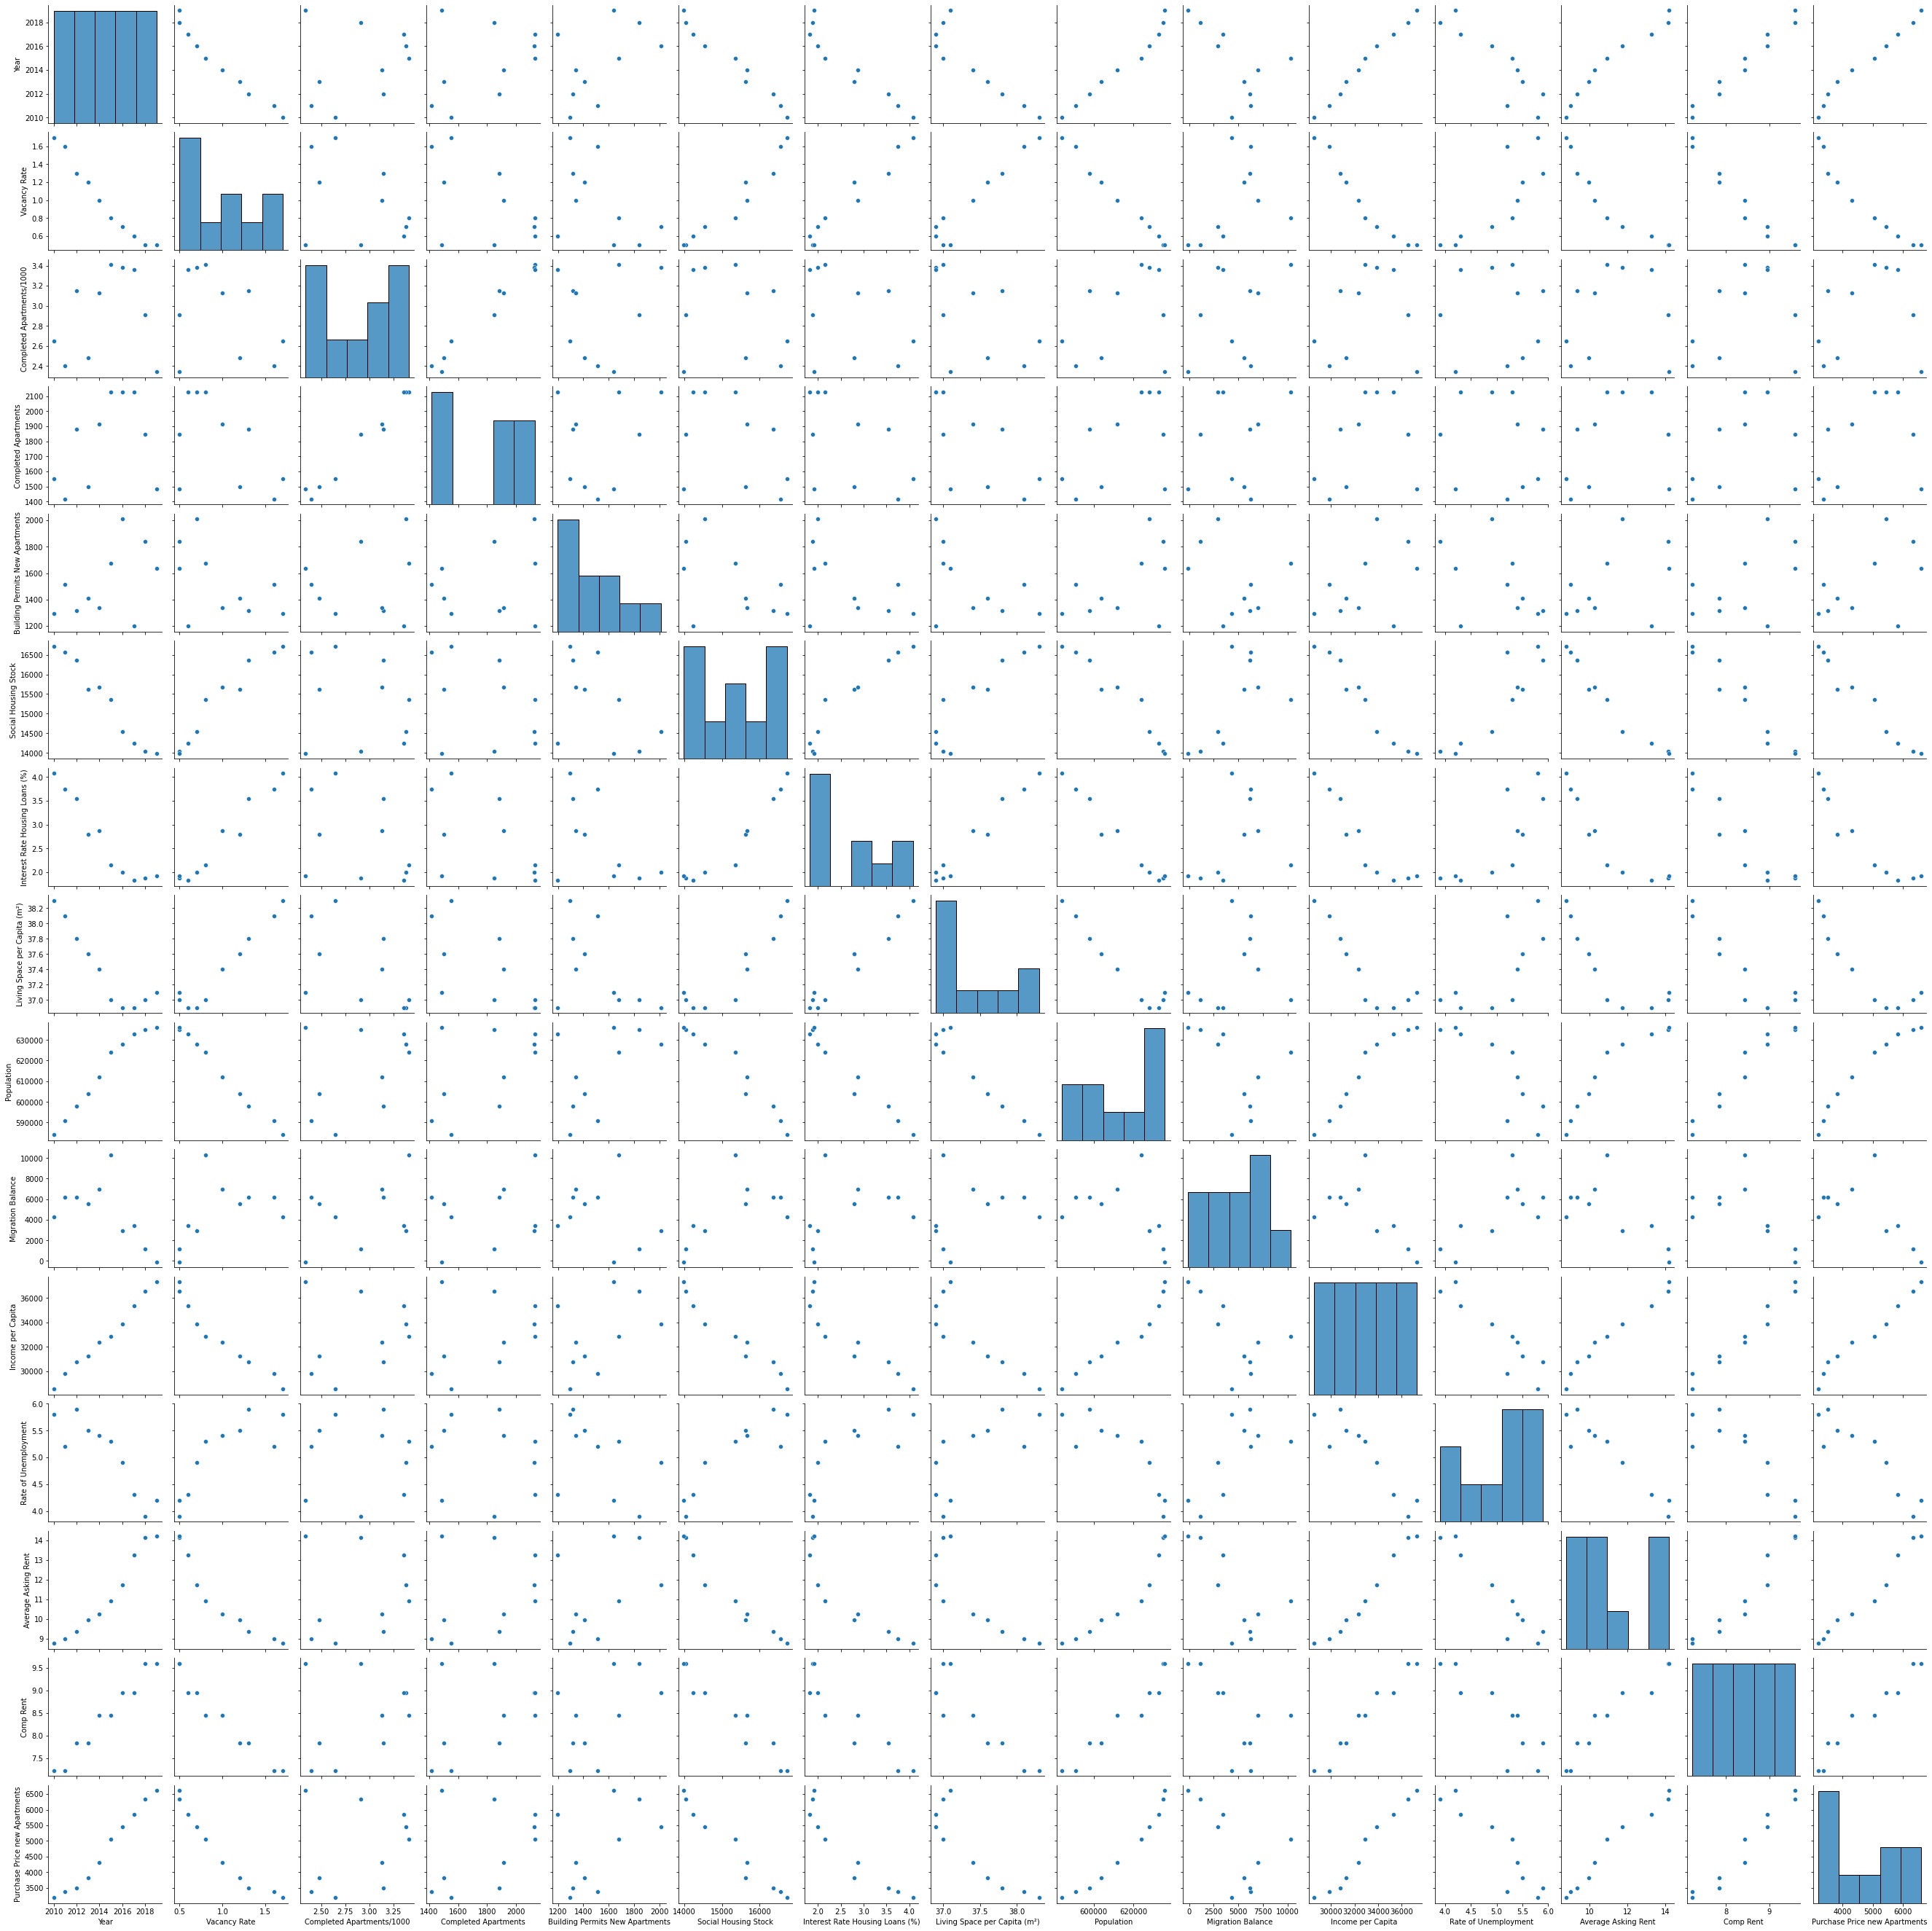

In [191]:
pp=sns.pairplot(customers)   #pairplot of all variables

In [194]:
customers.head(3)   #rechecking the variables

,Year,Vacancy Rate,Completed Apartments/1000,Completed Apartments,Building Permits New Apartments,Social Housing Stock,Interest Rate Housing Loans (%),Living Space per Capita (m²),Population,Migration Balance,Income per Capita,Rate of Unemployment,Average Asking Rent,Comp Rent,Purchase Price new Apartments
0,2010,1.7,2.65,1550,1292,16722,4.08,38.3,584000,4277,28552,5.8,8.76,7.22,3180
1,2011,1.6,2.40,1417,1515,16558,3.75,38.1,591000,6209,29853,5.2,9.00,7.22,3369
2,2012,1.3,3.15,1881,1316,16369,3.54,37.8,598000,6194,30780,5.9,9.35,7.84,3492


# Linear regression, Fitting and training the model

In [181]:
y = customers['Average Asking Rent']  #y variable assigned

In [196]:
X = customers[['Vacancy Rate', 'Completed Apartments/1000','Completed Apartments','Building Permits New Apartments','Social Housing Stock','Interest Rate Housing Loans (%)','Living Space per Capita (m²)','Population','Migration Balance','Rate of Unemployment','Comp Rent','Purchase Price new Apartments']]  #x variables assigned        

In [197]:
from sklearn.model_selection import train_test_split  #importing scikit (python library) learn for machine learning

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)  #splitting train and test data

In [199]:
from sklearn.linear_model import LinearRegression #importing linear algorithm

In [200]:
lm = LinearRegression()

In [201]:
lm.fit(X_train,y_train) #fitting the model

LinearRegression()

In [202]:
print('Coefficients: \n', lm.coef_)  

Coefficients: 
 [ 1.72874447e-07 -5.18333958e-07 -3.22655056e-04 -1.29546622e-03
  2.83231357e-04  8.23162308e-07  6.62961901e-07  4.32667634e-05
 -1.21478891e-04 -1.96073909e-06 -2.72066206e-07  1.04852280e-03]


In [203]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df    #coefficients printed

,Coefficient
Vacancy Rate,1.728744e-07
Completed Apartments/1000,-5.183340e-07
Completed Apartments,-3.226551e-04
Building Permits New Apartments,-1.295466e-03
Social Housing Stock,2.832314e-04
Interest Rate Housing Loans (%),8.231623e-07
Living Space per Capita (m²),6.629619e-07
Population,4.326676e-05
Migration Balance,-1.214789e-04
Rate of Unemployment,-1.960739e-06


In [204]:
print(lm.intercept_)    #the intercept

-21.61879452234586


In [205]:
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       -21.6188     7.294234e+07      -0.0            NaN
1         0.0000              NaN       NaN            NaN
2        -0.0000              NaN       NaN            NaN
3        -0.0003              NaN       NaN            NaN
4        -0.0013              NaN       NaN            NaN
5         0.0003              NaN       NaN            NaN
6         0.0000              NaN       NaN            NaN
7         0.0000     1.739820e+06       0.0            NaN
8         0.0000     1.599100e+01       0.0            NaN
9        -0.0001              NaN       NaN            NaN
10       -0.0000     2.099356e+05      -0.0            NaN
11       -0.0000              NaN       NaN            NaN
12        0.0010     4.818100e+02       0.0            NaN


<ipython-input-205-e0ae30085f7b>:12: RuntimeWarning: invalid value encountered in sqrt
  sd_b = np.sqrt(var_b)


In [206]:
print(params)

[-2.16188e+01  0.00000e+00 -0.00000e+00 -3.00000e-04 -1.30000e-03
  3.00000e-04  0.00000e+00  0.00000e+00  0.00000e+00 -1.00000e-04
 -0.00000e+00 -0.00000e+00  1.00000e-03]


In [207]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Vacancy Rate                      NaN
Completed Apartments/1000         NaN
Completed Apartments              NaN
Building Permits New Apartments   NaN
Social Housing Stock              NaN
Interest Rate Housing Loans (%)   NaN
Living Space per Capita (m²)      NaN
Population                        NaN
Migration Balance                 NaN
Rate of Unemployment              NaN
Comp Rent                         NaN
Purchase Price new Apartments     NaN
Name: P>|t|, dtype: float64


C:\Users\Jarvis\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Jarvis\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Jarvis\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Jarvis\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


In [208]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

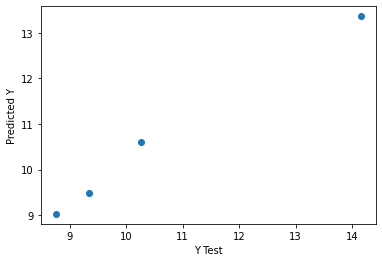

In [209]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')  #graph of predictions vs actual values

In [210]:
from sklearn import metrics       #printing the errors to measure model accuracy

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3859025661394675
MSE: 0.2080555725747998
RMSE: 0.45613109143622277


In [211]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')   #printing r squared value

95.28822319307918 %


# Checking for highly correlated variables

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


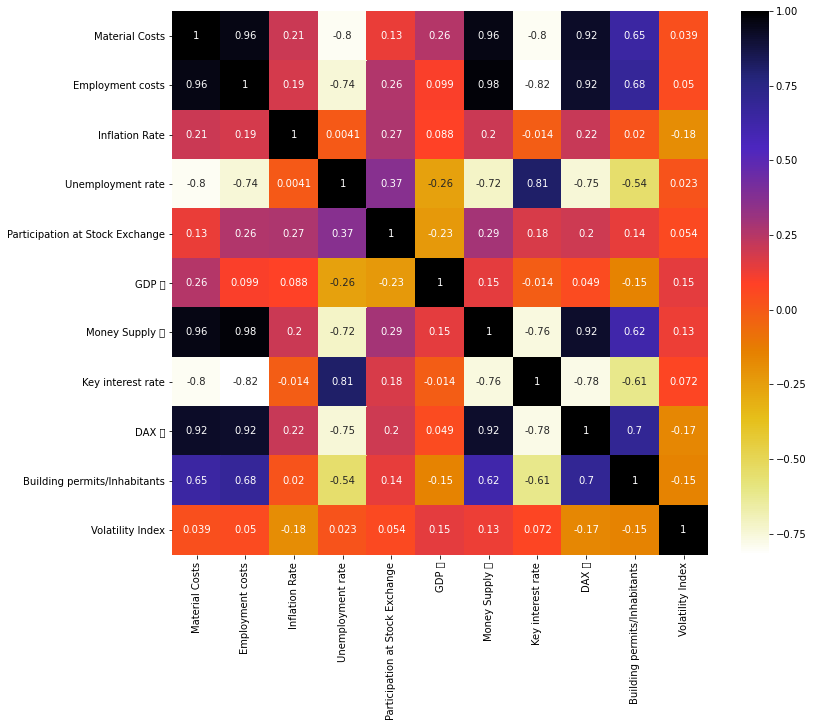

In [110]:
plt.figure(figsize=(12,10)) #we check for correlated variables through a heatmap
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [111]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

#we use this bit of code to identify variables with a certain level of correlation with each other

In [117]:
corr_features = correlation(X_train,0.90) #the threshold is set to 90 percent
len(set(corr_features))

3

In [118]:
corr_features #name of the highly correlated variables

{'DAX \x80', 'Employment costs', 'Money Supply \x80'}

In [119]:
X_train=X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)  #we remove the variables now

In [121]:
print(X)

    Material Costs  Inflation Rate  Unemployment rate  \
0             76.9          0.0055            0.10050   
1             79.9          0.0055            0.10300   
2             79.9          0.0011            0.10375   
3             79.9          0.0099            0.10600   
4             80.5          0.0012            0.10900   
..             ...             ...                ...   
67           110.0         -0.0028            0.06375   
68           112.5          0.0189            0.06325   
69           116.6          0.0148            0.05875   
70           123.9          0.0092            0.05575   
71           125.6          0.0090            0.05125   

    Participation at Stock Exchange         GDP   Key interest rate  \
0                              7843  9.180000e+11             0.0225   
1                              7843  8.940000e+11             0.0225   
2                              7843  9.050000e+11             0.0225   
3                          

In [129]:
X_train.head(5)

,Material Costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Key interest rate,Building permits/Inhabitants,Volatility Index
41,99.6,0.0000,0.05000,5967,1.380000e+12,0.0015,71250,16.57
48,99.4,0.0030,0.04325,6332,9.590000e+11,0.0000,65625,29.42
15,87.6,0.0135,0.08075,7947,1.290000e+12,0.0400,54600,19.40
38,98.9,0.0047,0.05175,6110,1.270000e+12,0.0040,74800,18.78
54,103.4,0.0059,0.03700,7168,1.090000e+12,0.0000,95700,15.11


In [130]:
X_test.head(5)

,Material Costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Key interest rate,Building permits/Inhabitants,Volatility Index
6,80.9,0.0065,0.11100,8066,9.450000e+11,0.0225,66000,16.13
50,101.0,0.0040,0.04025,6332,9.840000e+11,0.0000,103125,20.56
39,99.3,0.0038,0.05100,6110,1.310000e+12,0.0025,81600,15.53
32,97.3,0.0116,0.06800,6620,1.180000e+12,0.0075,42175,24.71
58,107.0,0.0067,0.03400,7785,1.200000e+12,0.0000,95425,16.79


In [131]:
lm2 = LinearRegression() #we fit the model again, train and test the data to get coefficients, intercepts and errors


In [132]:
lm2.fit(X_train,y_train)

LinearRegression()

In [133]:
print('Coefficients: \n', lm2.coef_)

Coefficients: 
 [ 3.95788345e+01 -8.85310045e+02  9.82830711e+02  2.23961290e-01
 -3.75679233e-10 -8.66343405e+03  1.22863098e-03 -1.34058953e+00]


In [134]:
print(lm2.intercept_)

-3230.349897351998


In [135]:
params = np.append(lm2.intercept_,lm2.coef_)
predictions = lm2.predict(X)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)


   Coefficients  Standard Errors  t values  Probabilities
0    -3230.3499          353.155    -9.147          0.000
1       39.5788            4.644     8.522          0.000
2     -885.3100         3219.504    -0.275          0.784
3      982.8307         1695.401     0.580          0.564
4        0.2240            0.028     8.126          0.000
5       -0.0000            0.000    -2.710          0.009
6    -8663.4340         2354.394    -3.680          0.000
7        0.0012            0.001     1.202          0.234
8       -1.3406            2.041    -0.657          0.514


In [136]:

import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Material Costs                     3.611732e-01
Inflation Rate                     1.603944e-01
Unemployment rate                  3.542067e-10
Participation at Stock Exchange    1.190280e-14
GDP                               1.678843e-01
Key interest rate                  9.299902e-05
Building permits/Inhabitants       3.886374e-01
Volatility Index                   9.368664e-01
Name: P>|t|, dtype: float64


In [137]:
predictions = lm2.predict( X_test) #graph of test vs actual values

Text(0, 0.5, 'Predicted Y')

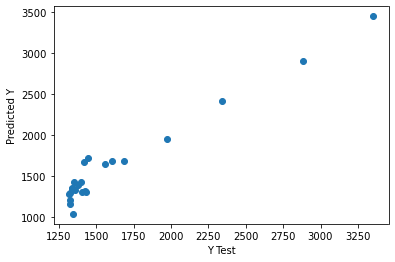

In [138]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [139]:
from sklearn import metrics #error calculation

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 86.18598063753973
MSE: 14517.234599106612
RMSE: 120.48748731344102


In [140]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')  #R squared value

94.5112395924756 %


# Mutual information selection feature setting

In [141]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info     #we sort variables on the basis of their mutual information values

array([1.51147862, 0.13481459, 1.38814036, 1.01906488, 0.50318815,
       0.82250861, 0.36761166, 0.11320441])

In [142]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False) # sorting values

Material Costs                     1.511479
Unemployment rate                  1.388140
Participation at Stock Exchange    1.019065
Key interest rate                  0.822509
GDP                               0.503188
Building permits/Inhabitants       0.367612
Inflation Rate                     0.134815
Volatility Index                   0.113204
dtype: float64

<AxesSubplot:>

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


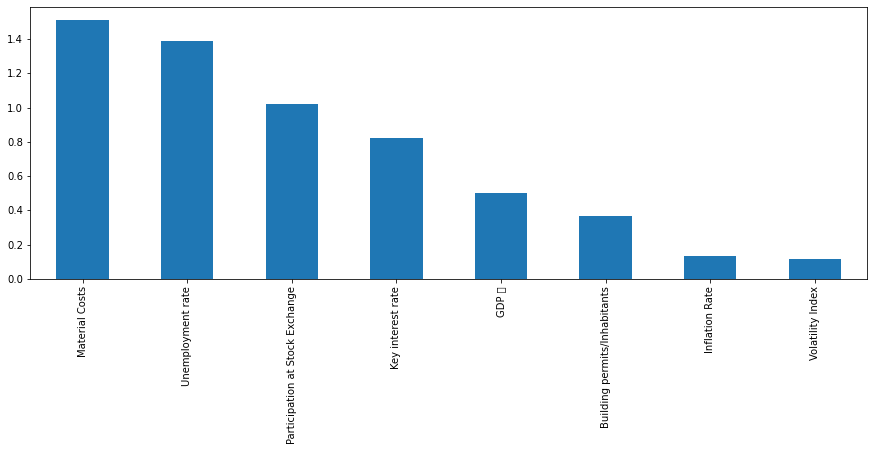

In [143]:
 mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))  #visualizing values

In [144]:
from sklearn.feature_selection import SelectPercentile  #selecting the top 80 percent of the features

In [145]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=80)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=80,
                 score_func=<function mutual_info_regression at 0x00000131572EED30>)

In [146]:
selected_top_columns.get_support()

array([ True, False,  True,  True,  True,  True,  True, False])

In [147]:
X_train.columns[selected_top_columns.get_support()]

Index(['Material Costs', 'Unemployment rate',
       'Participation at Stock Exchange', 'GDP ', 'Key interest rate',
       'Building permits/Inhabitants'],
      dtype='object')

In [148]:
X_train.head()

,Material Costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Key interest rate,Building permits/Inhabitants,Volatility Index
41,99.6,0.0000,0.05000,5967,1.380000e+12,0.0015,71250,16.57
48,99.4,0.0030,0.04325,6332,9.590000e+11,0.0000,65625,29.42
15,87.6,0.0135,0.08075,7947,1.290000e+12,0.0400,54600,19.40
38,98.9,0.0047,0.05175,6110,1.270000e+12,0.0040,74800,18.78
54,103.4,0.0059,0.03700,7168,1.090000e+12,0.0000,95700,15.11


In [48]:
#we remove volatility index and inflation rate 

In [149]:
X_train=X_train.drop('Volatility Index',axis=1)
X_train=X_train.drop('Inflation Rate',axis=1)

In [163]:
X=X.drop('Volatility Index',axis=1)
X=X.drop('Inflation Rate',axis=1)

In [151]:
X_test.head(2)

,Material Costs,Unemployment rate,Participation at Stock Exchange,GDP ,Key interest rate,Building permits/Inhabitants
6,80.9,0.11100,8066,9.450000e+11,0.0225,66000
50,101.0,0.04025,6332,9.840000e+11,0.0000,103125


In [152]:
from sklearn.linear_model import LinearRegression  #do the regression again to get results

In [154]:
lm3 = LinearRegression()

In [155]:
lm3.fit(X_train,y_train)

LinearRegression()

In [156]:
print('Coefficients: \n', lm3.coef_)

Coefficients: 
 [ 3.88956313e+01  9.15489020e+02  2.23570868e-01 -3.78236740e-10
 -8.88544994e+03  1.38851264e-03]


In [157]:
print(lm3.intercept_)

-3196.320205965543


In [158]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')  #R squared value

94.58984338507526 %


In [159]:
predictions = lm3.predict( X_test)

Text(0, 0.5, 'Predicted Y')

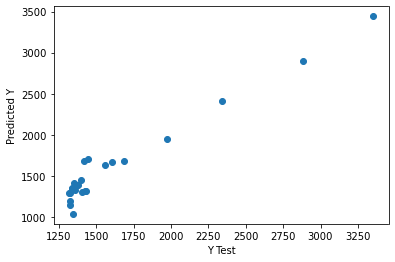

In [160]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [161]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 83.77473786130845
MSE: 14309.335253384701
RMSE: 119.62163371808923


In [164]:
params = np.append(lm3.intercept_,lm3.coef_)
predictions = lm3.predict(X)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0    -3196.3202          339.350    -9.419          0.000
1       38.8956            4.411     8.818          0.000
2      915.4890         1658.000     0.552          0.583
3        0.2236            0.027     8.238          0.000
4       -0.0000            0.000    -2.783          0.007
5    -8885.4499         2287.317    -3.885          0.000
6        0.0014            0.001     1.428          0.158


In [165]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Material Costs                     2.807030e-01
Unemployment rate                  1.243093e-10
Participation at Stock Exchange    3.566697e-15
GDP                               1.279571e-01
Key interest rate                  1.417778e-04
Building permits/Inhabitants       4.876978e-01
Name: P>|t|, dtype: float64


# Pairplots

In [12]:
customers2 = pd.read_csv("C:/Users/Jarvis/Desktop/mt_data22.csv",encoding= 'unicode_escape')  # importing file

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


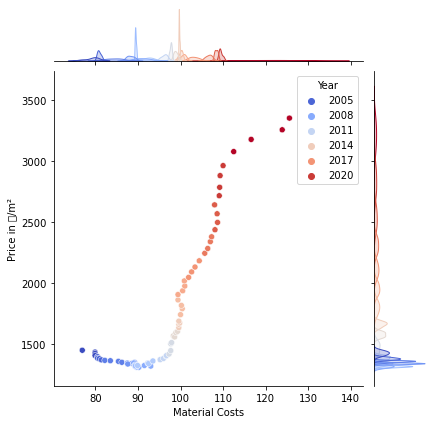

In [16]:
sns.jointplot(y='Price in /m²',x='Material Costs',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


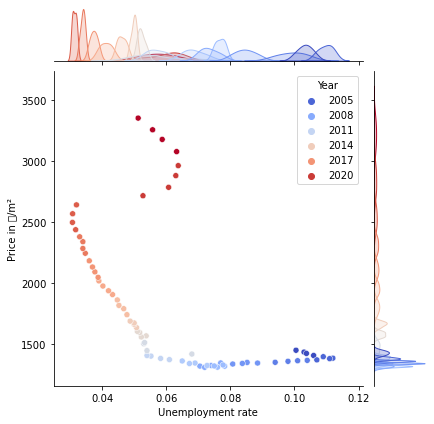

In [17]:
sns.jointplot(y='Price in /m²',x='Unemployment rate',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


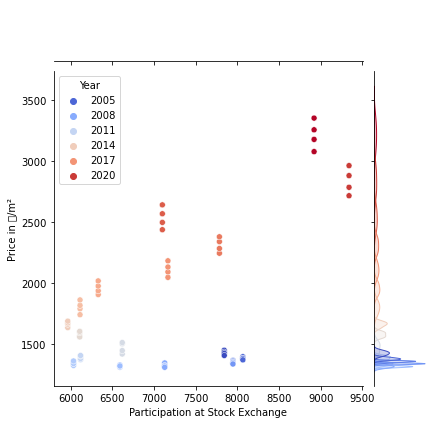

In [18]:
sns.jointplot(y='Price in /m²',x='Participation at Stock Exchange',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


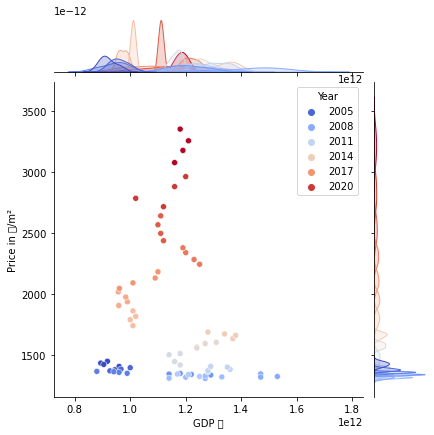

In [19]:
sns.jointplot(y='Price in /m²',x='GDP ',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


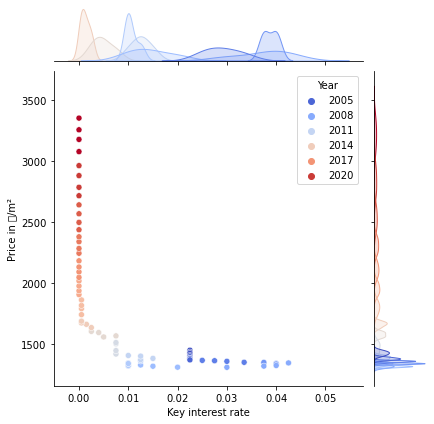

In [20]:
sns.jointplot(y='Price in /m²',x='Key interest rate',hue='Year',data=customers2,palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


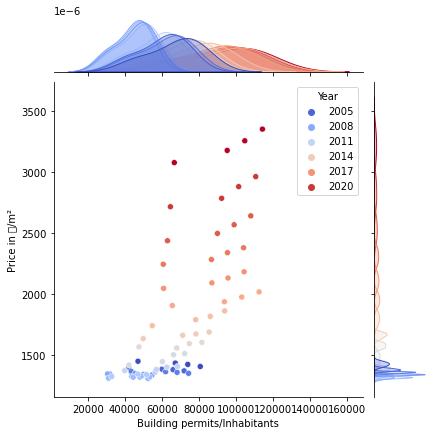

In [21]:
sns.jointplot(y='Price in /m²',x='Building permits/Inhabitants',hue='Year',data=customers2,palette='coolwarm')

# END here

In [90]:
customers2 = pd.read_csv("C:/Users/Jarvis/Desktop/mt_data22.csv",encoding= 'unicode_escape')

In [91]:
customers2.head(5)

,Quartal,Year,Price in /m²,Material Costs,Employment costs,Inflation Rate,Unemployment rate,Participation at Stock Exchange,GDP ,Money Supply ,Key interest rate,DAX ,Building permits/Inhabitants,Volatility Index
0,1,2004,1448,76.9,83.2,0.0055,0.10050,7843,9.180000e+11,1.640000e+12,0.0225,4018.51,47075,22.06
1,2,2004,1433,79.9,83.3,0.0055,0.10300,7843,8.940000e+11,1.640000e+12,0.0225,3950.01,67250,23.07
2,3,2004,1422,79.9,83.2,0.0011,0.10375,7843,9.050000e+11,1.640000e+12,0.0225,3858.88,73975,19.55
3,4,2004,1405,79.9,81.3,0.0099,0.10600,7843,9.600000e+11,1.640000e+12,0.0225,4079.26,80700,16.97
4,1,2005,1395,80.5,83.6,0.0012,0.10900,8066,1.000000e+12,1.770000e+12,0.0225,4309.37,42000,13.50


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


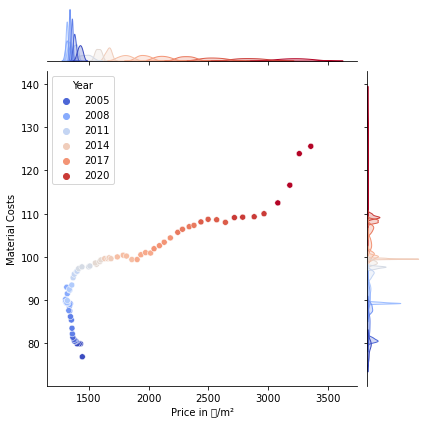

In [103]:
sns.jointplot(x='Price in /m²',y='Material Costs',data=customers2,hue='Year',palette='coolwarm')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


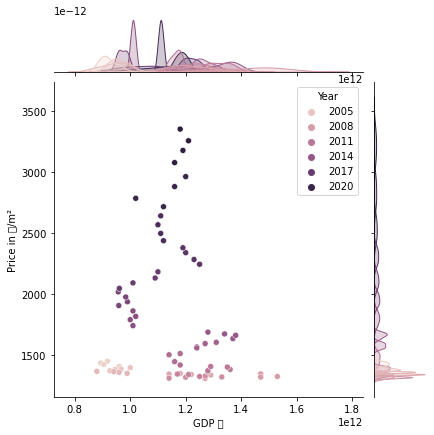

In [100]:
sns.jointplot(x='GDP ',y='Price in /m²',data=customers2,hue='Year')

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


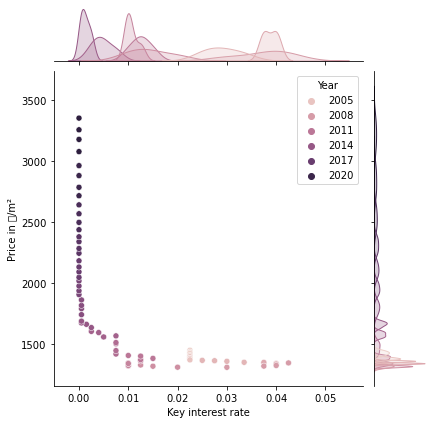

In [96]:
sns.jointplot(x='Key interest rate',y='Price in /m²',data=customers2,hue='Year')

In [322]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

In [93]:
lm.fit(X_train,y_train)

LinearRegression()

In [94]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 3.76664307e+01  7.63653798e+02  2.38351313e-01 -2.46543322e-10
 -8.10022576e+03  1.68366335e-03]


In [95]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

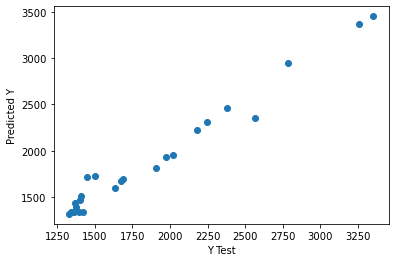

In [96]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [97]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81.58223648191874
MSE: 11521.31886260398
RMSE: 107.33740663256206


In [98]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

96.79319975885458 %


C:\Users\Jarvis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price in \x80/m²', ylabel='Density'>

C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jarvis\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


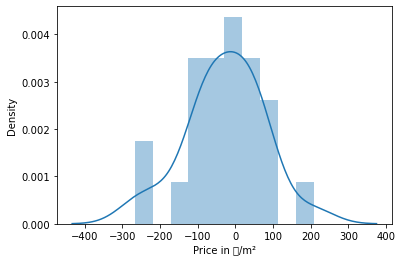

In [335]:
sns.distplot((y_test-predictions),bins=10)

# ending here

Feature 0: 11.062683
Feature 1: 3.658726
Feature 2: 6.056499
Feature 3: 0.438893
Feature 4: 17.281429
Feature 5: 4.056207
Feature 6: 2.848413
Feature 7: 0.678655
Feature 8: 4.639745
Feature 9: 11.178183
Feature 10: 14.594848


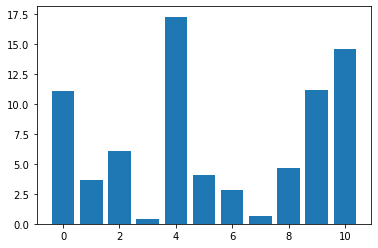

In [ ]:
X = customers[['Material Costs', 'Employment costs', 'Unemployment rate in %','Participation at Stock Exchange','GDP in Billion Dollar','Money Supply M1, M2 & M3','Key interest rate in %','DAX in ','Anzahl von Baugenehmigungen pro Einwohner in 1000 als proxy','Volatilitätsindex']]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lm = LinearRegression()

In [117]:
lm.fit(X_train,y_train)

LinearRegression()

In [118]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 42.69712913 -32.29251094   0.21971605   3.11419682  -2.87208296]


In [119]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

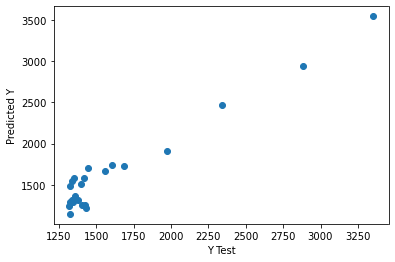

In [121]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [122]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 117.9667907362242
MSE: 19183.85425308439
RMSE: 138.50579140629605


In [123]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Material Costs,42.697129
Inflation in %,-32.292511
Participation at Stock Exchange,0.219716
Anzahl von Baugenehmigungen pro Einwohner in 1000 als proxy,3.114197
Volatilitätsindex,-2.872083


In [50]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 

 


In [61]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [105]:
# load the dataset
X, y = make_regression(n_samples=72, n_features=11, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)



MAE: 0.097


In [106]:
predictions = lm.predict( X_test_fs)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 11)

ValueError: x and y must be the same size

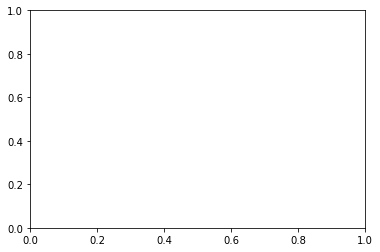

In [100]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [89]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 22017628.174990494
